In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pathlib import Path

df_case = pd.read_csv('Case_Shiller.csv')
df_mud = pd.read_csv('MORTGAGE30US.csv')

In [21]:
df_case.head(5)

,DATE,CSUSHPINSA
0,1987-01-01,63.735
1,1987-02-01,64.134
2,1987-03-01,64.470
3,1987-04-01,64.973
4,1987-05-01,65.547


In [46]:
len(merged_df)

59

In [47]:
df_mud.head(5)


,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [48]:
df_mud["DATE"]=pd.to_datetime(df_mud["DATE"])

In [49]:
df_mud.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          2759 non-null   datetime64[ns]
 1   MORTGAGE30US  2759 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.2 KB


In [59]:
merged_df = pd.merge(df_case,df_mud, on='DATE', how='inner')
merged_df.head(4)

,DATE,CSUSHPINSA,MORTGAGE30US
0,1987-05-01,65.547,10.47
1,1988-04-01,69.788,10.05
2,1988-07-01,71.686,10.39
3,1989-09-01,76.421,10.22


In [51]:
df_mud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          2759 non-null   datetime64[ns]
 1   MORTGAGE30US  2759 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.2 KB


In [61]:
merged_df.head(4)


,DATE,CSUSHPINSA,MORTGAGE30US
0,1987-05-01,65.547,10.47
1,1988-04-01,69.788,10.05
2,1988-07-01,71.686,10.39
3,1989-09-01,76.421,10.22


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.2, random_state =0)

In [65]:
X = merged_df["CSUSHPINSA"]

In [66]:
Y=merged_df["MORTGAGE30US"]

In [69]:
#create regression
reg = LinearRegression()
reg

LinearRegression()

In [70]:
#train or fit the dataset for traning and testing
reg.fit(X_train,Y_train)

LinearRegression()

In [72]:
r2_train = reg.score(X_train,Y_train)
r2_train

0.46632176968528727

In [73]:
r2_test = reg.score(X_test,Y_test)
r2_test


0.4977693141414865

In [89]:
Y_predict = reg.predict(X_test)
Y_predict

array([6.6094787 , 5.92603634, 6.0938654 , 6.2491722 , 7.86971517,
       8.02409766, 5.74687342, 5.55358171, 6.62704067, 7.1088945 ,
       7.91819765, 7.88135713])

In [90]:
intercept = reg.intercept_
intercept

9.60172603351818

In [91]:
coef = reg.coef_
coef

array([-0.02200748])

In [93]:
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(Y_test,Y_predict))
rmse

1.432835371760201

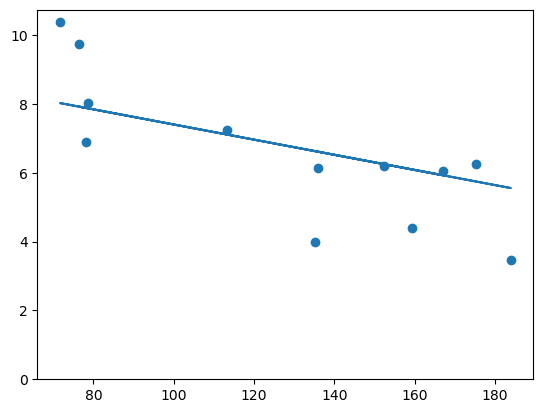

In [96]:
# plotting the result using matpolotlib
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_predict)
plt.ylim(ymin=0)
plt.show()